<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/9%EC%9E%A5_%EC%B4%9D%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [2]:
%matplotlib inline

In [9]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Dropout

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

In [13]:
model = keras.Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, activation='relu')) #https://keras.io/api/layers/convolution_layers/convolution1d/
# 이미지의 특성을 찾듯, 자연어의 특성을 잘 찾아낼 수 있음
model.add(MaxPooling1D(4))
model.add(SimpleRNN(40))
model.add(Dense(1, activation='sigmoid')) #이진분류

In [14]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 simple_rnn (SimpleRNN)      (None, 40)                4200      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                      

In [15]:
model.compile('adam','binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

# 특징을 잘 캐치하니까, epoch를 조금만 돌려도 정확도가 올라간다!
# 늘리면 더 올라감

Epoch 1/5
250/250 [==============================] - 20s 34ms/step - loss: 0.5137 - accuracy: 0.7209 - val_loss: 0.3848 - val_accuracy: 0.8318
Epoch 2/5
250/250 [==============================] - 8s 33ms/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 0.3466 - val_accuracy: 0.8518
Epoch 3/5
250/250 [==============================] - 9s 34ms/step - loss: 0.2598 - accuracy: 0.8945 - val_loss: 0.3657 - val_accuracy: 0.8393
Epoch 4/5
250/250 [==============================] - 8s 33ms/step - loss: 0.2145 - accuracy: 0.9173 - val_loss: 0.3591 - val_accuracy: 0.8478
Epoch 5/5
250/250 [==============================] - 8s 33ms/step - loss: 0.1571 - accuracy: 0.9418 - val_loss: 0.4422 - val_accuracy: 0.8419


In [19]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.4422 - accuracy: 0.8419


[0.4421919286251068, 0.841920018196106]

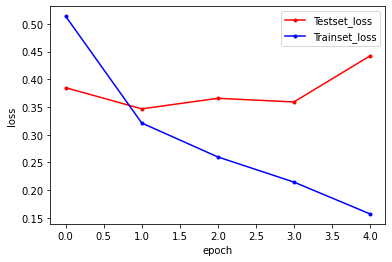

In [17]:
_y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [20]:
model2 = keras.Sequential()
model2.add(Embedding(5000,100))
model2.add(Dropout(0.5))
model2.add(Conv1D(64, 5, activation='relu'))
model2.add(MaxPooling1D(4))
model2.add(LSTM(40))
model2.add(Dense(1, activation='sigmoid'))

In [21]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 40)                16800     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                      

In [23]:
model2.compile('adam','binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 8s 26ms/step - loss: 0.2301 - accuracy: 0.9083 - val_loss: 0.3281 - val_accuracy: 0.8571
Epoch 2/5
250/250 [==============================] - 6s 23ms/step - loss: 0.1960 - accuracy: 0.9250 - val_loss: 0.3423 - val_accuracy: 0.8566
Epoch 3/5
250/250 [==============================] - 6s 24ms/step - loss: 0.1609 - accuracy: 0.9398 - val_loss: 0.3765 - val_accuracy: 0.8503
Epoch 4/5
250/250 [==============================] - 6s 23ms/step - loss: 0.1361 - accuracy: 0.9497 - val_loss: 0.4136 - val_accuracy: 0.8494
Epoch 5/5
250/250 [==============================] - 6s 24ms/step - loss: 0.1115 - accuracy: 0.9596 - val_loss: 0.4266 - val_accuracy: 0.8488


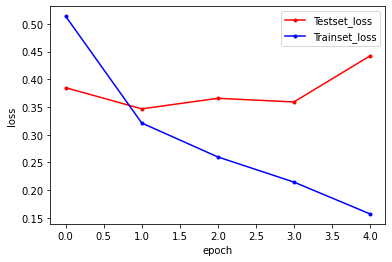

In [24]:
_y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show() 

In [26]:
model3 = keras.Sequential()
model3.add(Embedding(5000,100))
model3.add(Dropout(0.5))
model3.add(Conv1D(64, 5, activation='relu'))
model3.add(MaxPooling1D(4))
model3.add(LSTM(40, return_sequences=True))
model3.add(Dropout(0.1))
model3.add(LSTM(40))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))

In [27]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, None, 40)          16800     
                                                                 
 dropout_5 (Dropout)         (None, None, 40)          0         
                                                      

In [29]:
model3.compile('adam','binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 21s 42ms/step - loss: 0.4746 - accuracy: 0.7541 - val_loss: 0.3443 - val_accuracy: 0.8495
Epoch 2/5
250/250 [==============================] - 9s 34ms/step - loss: 0.3022 - accuracy: 0.8738 - val_loss: 0.3305 - val_accuracy: 0.8562
Epoch 3/5
250/250 [==============================] - 9s 38ms/step - loss: 0.2516 - accuracy: 0.8980 - val_loss: 0.3245 - val_accuracy: 0.8596
Epoch 4/5
250/250 [==============================] - 10s 38ms/step - loss: 0.2208 - accuracy: 0.9128 - val_loss: 0.3464 - val_accuracy: 0.8557
Epoch 5/5
250/250 [==============================] - 8s 34ms/step - loss: 0.1857 - accuracy: 0.9286 - val_loss: 0.3526 - val_accuracy: 0.8562


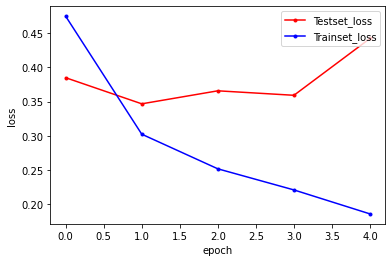

In [30]:
_y_vloss = history3.history['val_loss']
y_loss = history3.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show() 